# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
It is a classification problem as there are only two discrete possible outcomes : Intervention Needed(1) and Intervention not needed(0). 

![alt text](index.png "Title")

The above figure shows a binary classification problem having two classes of outcomes represented by two different symbols

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = len(student_data.columns[0:-1])

# TODO: Calculate passing students
n_passed = len(student_data[student_data.passed == 'yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data.passed == 'no'])

# TODO: Calculate graduation rate
grad_rate = float(n_passed)/n_students*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
def shuffle_and_split_data(X_all, y_all):
    random_state = 33
    xtrain, xtest, ytrain, ytest = train_test_split(X_all, y_all, test_size=0.2405, random_state = random_state)
    return xtrain, xtest, ytrain, ytest

xtrain, xtest, ytrain, ytest = shuffle_and_split_data(X_all, y_all)

X_train = xtrain
X_test = xtest
y_train = ytrain
y_test = ytest


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **
The three supervised models that are appropriate for this problem are :
-- Logistic Regression
-- Support Vector Machines(SVM)
-- Ensemble Methods(RandomForest)


#### 1) Logistic Regression :  
1.1) Logistic Regression can be used to predict for 'Credit Risk Analysis'. It can be used to predict for which    party a person is going to vote for.It can even be used to predict wheter a student will get an                       admission to a college or not based on a number of criteria.   
(Sources:https://smartdrill.com/logistic-regression.html ,Quora, Google)
      
1.2) Advantages of Logistic Regression :
* You can use more than one explanatory variable (dependent variable) and those can either be dichotomous,              ordinal, or continuous.
* It helps to remove the 'confounding effect'.
* It does not need a linear relationship between the dependent and independent variables. Logistic                      regression can handle all sorts of relationships, because it applies a non-linear log transformation to                the predicted odds ratio. 
* The independent variables do not need to be metric (interval or ratio scaled).
* Logistic Regression performs well when features are roughly linear and the problem is likely to be                    linearly separable
           
1.3) Disadvantages of Logistic Regression :
* Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression                requires the dependent variable to be ordinal. 
* Linearity test is required on a non-binomial dependent variable before including it in the model.
* It combines both binomial and normal distribution which can cause problems sometimes.
* Logistic Regression performs poorly if the features are highly correlated.
           
1.4) Logistic Regression can be applied to our data as it can be seen thet the features are not so highly      correlated. Also, the outcome is a binomial distribution   



In [6]:
X_all.corr().head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
school_GP,1.000000,-1.000000,-0.012286,0.012286,-0.377610,-0.279797,0.279797,0.064866,-0.064866,0.045923,...,0.024150,0.133578,-0.060700,0.047926,-0.032988,0.007152,-0.114209,-0.065087,0.042651,0.088480
school_MS,-1.000000,1.000000,0.012286,-0.012286,0.377610,0.279797,-0.279797,-0.064866,0.064866,-0.045923,...,-0.024150,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480
sex_F,-0.012286,0.012286,1.000000,-1.000000,0.028606,-0.028504,0.028504,0.089862,-0.089862,0.023443,...,0.151056,-0.044113,0.102023,-0.058971,-0.238744,-0.075897,-0.268171,-0.274194,-0.143588,0.066962
sex_M,0.012286,-0.012286,-1.000000,1.000000,-0.028606,0.028504,-0.028504,-0.089862,0.089862,-0.023443,...,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962
age,-0.377610,0.377610,0.028606,-0.028606,1.000000,0.146722,-0.146722,-0.037847,0.037847,-0.029598,...,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230


#### 2) Support Vector Machines(SVM) : 
2.1) SVM is used in financial industries in financial time series forecasting. (Source : http://www.svms.org/finance/)

2.2) Advantages of SVM:
* It is a great classsification algorithm that gives a better decision boundary, a boundary with a large margin. This can be seen in the fig. below.
![alt text](svm.png "Title")

* SVM even works well to find a decision boundary if the data is not linearly separable(i.e. can't be fitted with a straight line). This is shown below.
![alt text](svm2.png "Title")
SVM provides us the choice of choosing a non-linear kernel too

* Less Overfiting in nature.
* Robust to noise
* SVM performs well if there is a two-class problem with balanced data set with almost zero or little noise.
* It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient

2.3) Disadvantages of SVM:
* SVMs do not perform well on highly skewed/imbalanced data sets. These are training data sets in which the number of samples that fall in one of the classes far outnumber those that are a member of the other class.
* SVMs are also not a good option specially if you have multiple classes. 
![alt text](svm3.png "Title")
* SVM is not good for incremental learning
* SVM is not desirable for very large datasets. Also, it performs very poorly if the number of features are greater in number than the number of training examples.

2.4) SVM is well suited for our dataset because there are only two classes of outcome. Also, the number of features are not so large as well as the training set is relatively small, hence SVM is a good choice.




#### 3) Ensemble Methods (Random Forest)

3.1) Application in industry : Random Forest algorithm is widely used in finance as well as in Machine Fault diagnosis
(source: http://link.springer.com/chapter/10.1007%2F978-1-84628-814-2_82 , http://www.scientific.net/AMM.740.947)

3.2) Advantages of Ensembles(Random Forest) :
* They do not expect linear features or even features that interact linearly.
* These algorithms handle very well high dimensional spaces as well as large number of training examples.
* RF generates an internal unbiased estimate of the generalization error as the forest building progresses.
* RF has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
* Random Forests attempts to mitigate the problems of high variance and high bias by averaging to find a natural balance between the two extremes.

![alt text](rf.png "Title")


* RF perfroms well if the datset is class-balanced i.e.no class contains significantly more samples than the other.

3.3) Disadvantages of Ensembles(Random Forest):
* RF are prone to 'Overfiting' if the dataset is noisy
* As the dataset grows, large number of trees are required, hence complexity of the model increases.
* For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data.
* RF performs poorly when the number of dimensions is tooo high as compared to the number of training examples. Also, it is not the best suited algorihm when dataset contain categorical features at different levels as it will overfit in this case.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [8]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
# from sklearn import model_B
# from skearln import model_C

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=33)
clf_B = SVC(random_state=33)
clf_C = RandomForestClassifier(random_state =33)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train
y_train_300 = y_train

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
print'--- Trianing size 100 --'
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
print ' '

print '--- Training size 200 ---'
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
print ' '

print '--- Training size 300 --'
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

--- Trianing size 100 --
Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.1120 seconds
Made predictions in 0.0400 seconds.
F1 score for training set: 0.9610.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6880.
Training a SVC using a training set size of 100. . .
Trained model in 0.0240 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9048.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7248.
Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0810 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.6977.
 
--- Training size 200 ---
Training a LogisticRegression using a training set size of 200. . .
Trained model in 0.0030 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8763.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7442.
Traini

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - LogisticRegression**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.1120          |    0.000               |    0.9610        |    0.6880       |
| 200               |         0.0030          |    0.000               |    0.8763        |    0.7442       |
| 300               |         0.0030          |    0.000               |    0.8571        |    0.7023       |

** Classifer 2 - SVM**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0240           |      0.0010            |    0.9048        |     0.7248      |
| 200               |        0.0030           |      0.0010            |    0.8854        |     0.7101      |
| 300               |        0.0070           |      0.0010            |    0.8758        |     0.7246      |

** Classifer 3 - RandomForest**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0810            |       0.0010           |    1.0000        |     0.6977      |
| 200               |       0.0330            |       0.0020           |    0.9929        |     0.6508      |
| 300               |       0.0230            |       0.0010           |    0.9858        |     0.6774      |

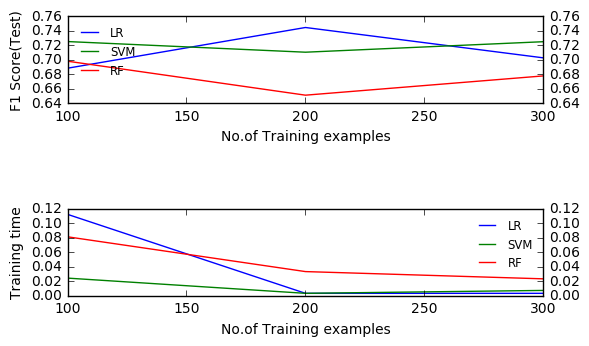

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt


x = [100,200,300]
y = [[0.6880, 0.7248, 0.6977],[0.7442, 0.7101, 0.6508 ],[0.7023, 0.7246, 0.6774]]
plt.xlabel('No.of Training examples')
plt.ylabel('F1 Score(Test)')
plt.plot(x,y )
plt.legend(['LR','SVM','RF'],loc=2,fontsize='small',fancybox=None, frameon=False)
plt.tick_params(labelright=True)

plt.subplot(212)
y = [[0.1120, 0.0240, 0.0810],[0.0030, 0.0030, 0.0330],[0.0030, 0.0070, 0.0230]]
plt.xlabel('No.of Training examples')
plt.ylabel('Training time')
plt.plot(x,y )
plt.legend(['LR','SVM','RF'],loc=1,fontsize='small',fancybox=None, frameon=False)
plt.tick_params(labelright=True)

plt.subplots_adjust(hspace=50.0)
plt.tight_layout()

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
The model selection is mainly dependent on two things :
* Training time : As we can see from the graph shown below, that RandomForest performs poorly in terms of training time. The performance of Logistic Regression as well as Support Vector Machines are very close . Hence we can infer that upto this point (not taking F1 score in consideration yet but talking in terms of cost), thatout of the three models, Logistic Regression or SVM should be considered for model selection

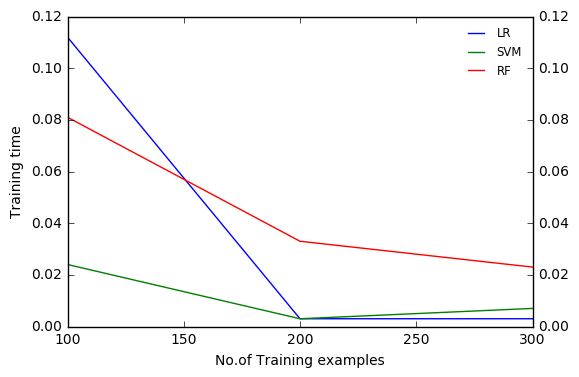

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

x = [100,200,300]
y = [[0.1120, 0.0240, 0.0810],[0.0030, 0.0030, 0.0330],[0.0030, 0.0070, 0.0230]]
plt.xlabel('No.of Training examples')
plt.ylabel('Training time')
plt.plot(x,y )
plt.legend(['LR','SVM','RF'],loc=1,fontsize='small',fancybox=None, frameon=False)
plt.tick_params(labelright=True)

* F1 Score on test set : As we can see from the graph shown below, SVM outperforms both LR and RF in terms of F1 score.

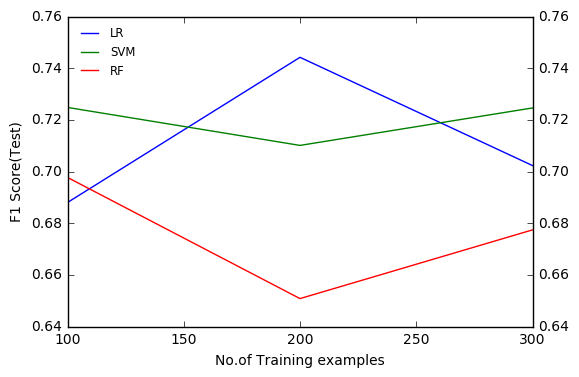

In [53]:
x = [100,200,300]
y = [[0.6880, 0.7248, 0.6977],[0.7442, 0.7101, 0.6508 ],[0.7023, 0.7246, 0.6774]]
plt.xlabel('No.of Training examples')
plt.ylabel('F1 Score(Test)')
plt.plot(x,y )
plt.legend(['LR','SVM','RF'],loc=2,fontsize='small',fancybox=None, frameon=False)
plt.tick_params(labelright=True)

Based upon the two facts stated above, we can say that SVM is the optimal model for our dataset.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **
Support Vector Machines(SVM) is a classification algorithm. Supoose there are two types of coloured balls as shown in the figure below which you want to separate by drwaing a decision boundary.
![alt text](SVM_2.png "Title")

Now as you see in the above figure that there can be infinte lines any of which can be used to separate red balls from green balls. Then why SVM? .The thing that differentiates SVM is that SVM will choose the dotted line(shown above in the fig) in order to separate the data. you may ask why ? The answer is that SVM believes in 'large margin'. Better the gap between two classes , better is the decision boundary. That's why SVM will choose the dotted line and that's why  it is also known as 'Large-Margin Classifier'.

Now you may argue that if I arrange the balls in such a way that a line cannot be fitted, how then will the SVM classifier will work? How will it separate the balls. 
Your question is reasonable. Let's look at an example of such type of situations. This is shown below in the fig:
![alt text](1.png "Title")

SVM will still be able to separate the balls. How? Here lies the beauty of SVM. SVM has a special tool known as 'kernels'. This tool allows SVM classifier to take many complex shapes which may not be linear. You can think that with the help of kernels SVM becomes flexible. Hence the balles now will be separated with a plane in the first case and with a circular boundary in the second case as shown in the above fig.




### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [8]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'C' : [0.01, 0.1, 1.0, 10, 100], 'kernel' : ['linear','rbf']}

# TODO: Initialize the classifier
clf = SVC(random_state=33)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0150 seconds.
Tuned model has a training F1 score of 0.8258.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.7248.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **
The final model's F1 scores are as :
* Training F1 score --> 0.8258
* Testing F1 score --> 0.7348

As compared to the untuned model, the F1 score of tuned model is better(though not that much) for test data. For the untuned model F1 score for test was 0.7246 while after tuning the model achieved a F1 score of 0.7248. This can be observed from the figure shown below :

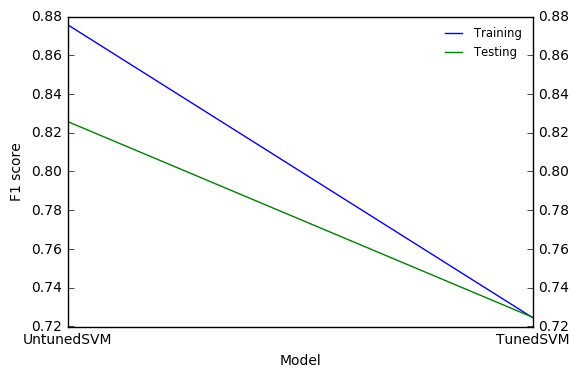

In [10]:
x = [0,1]
y = [[0.8758, 0.8258],[0.7246, 0.7248]]
my_xticks  = ['UntunedSVM', 'TunedSVM']
plt.xlabel("Model")
plt.ylabel("F1 score")
plt.xticks(x,my_xticks)
plt.plot(x,y)
plt.legend(['Training','Testing'], fontsize='small', frameon=False)
plt.tick_params(labelright=True)

References : Google, http://stackoverflow.com/, http://scikit-learn.org/

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.